load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


Text(0.5, 1.0, 'auto detected activation and appended')

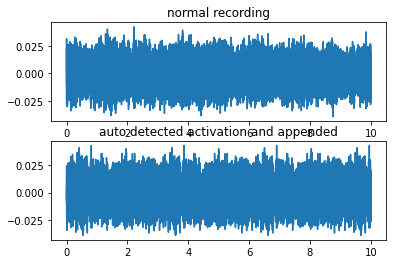

In [1]:
# Test
import librosa
import os
BASE_FOLDER =  r'../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

file_path = r'\dataset\min6dB\slider\id_04\normal\00000004.wav'
y, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
t = np.linspace(0,len(y[0])/sr,len(y[0]))

sliced_data = TimeSliceAppendActivation(y,sr)

n=2
plt.subplot(211)
plt.plot(t,y[n])
plt.title('normal recording')
plt.subplot(212)
plt.plot(t,sliced_data[n])
plt.title('auto detected activation and appended')

the slicer cuts out only the very dominant wave form but overlooks the secound dampend action noise it is quastinable if the valve failure mode is detectable like this - not fully closing or opening ... while the solinoid spring movement creates the same noise indepentently while the delay between spring action and current activation maybe a topc fro time sequence problem ...

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


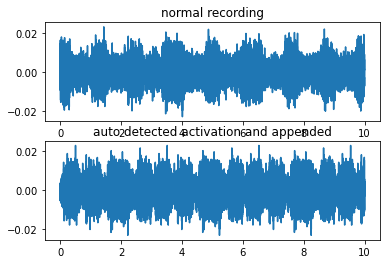

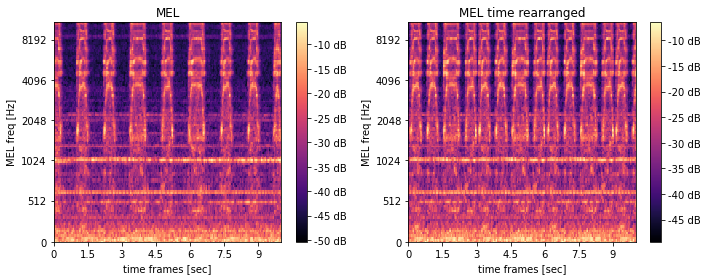

In [3]:
# Test
import librosa
import os
BASE_FOLDER =  r'../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

file_path = r'\dataset\6dB\slider\id_04\normal\00000004.wav'
y, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
t = np.linspace(0,len(y[0])/sr,len(y[0]))

sliced_data = TimeSliceAppendActivation(y,sr)

n=2
plt.subplot(211)
plt.plot(t,y[n])
plt.title('normal recording')
plt.subplot(212)
plt.plot(t,sliced_data[n])
plt.title('auto detected activation and appended')

plt.figure(figsize=(10,4))
plt.subplot(121)
mel_n = feature_extractor_mel(BASE_FOLDER,'mel1')
mel_n.set_hyperparamter(n_mels=120, n_fft=2048)
mel_n.create_from_wav(file_path)
mel_n.plot()
plt.xlabel('time frames [sec]')
plt.ylabel('MEL freq [Hz]')
plt.title('MEL')



plt.subplot(122)
wmf = memory_wave_file()
wmf.srate = sr
wmf.channel = sliced_data
mel_n = feature_extractor_mel(BASE_FOLDER,'mel1')
mel_n.set_hyperparamter(n_mels=120, n_fft=2048)
mel_n.create_from_wav(wmf)
mel_n.plot()
plt.xlabel('time frames [sec]')
plt.ylabel('MEL freq [Hz]')
plt.title('MEL time rearranged')
plt.tight_layout()

plt.savefig(f'MEL_timeslice_slider.png', transparent=True, dpi=300)